In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

from tqdm import tqdm
from paretoset import paretoset

import model_functions as fmodel

# Matrix ISA Model Example Usage

100%|██████████| 8/8 [00:00<00:00, 869.96it/s]


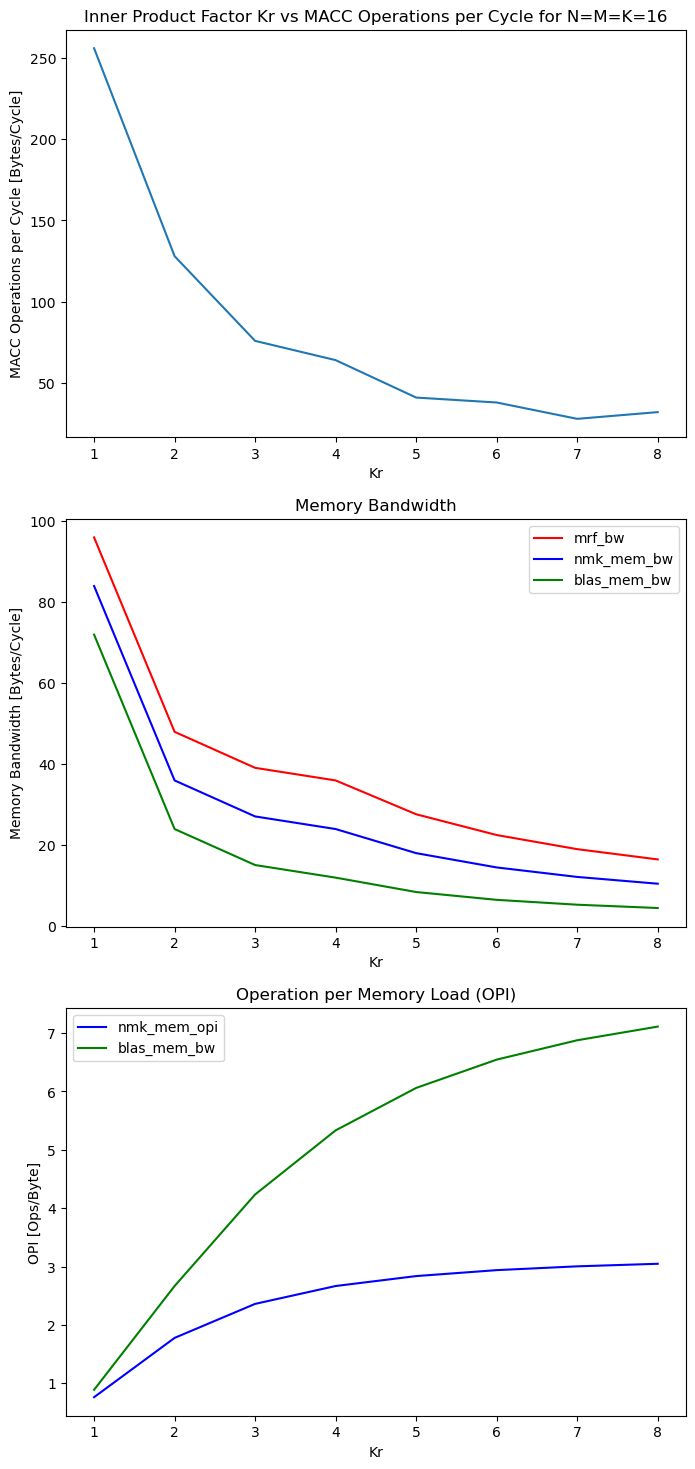

In [2]:
fig, axs = plt.subplots(3, figsize=(8,18))
axs[0].set_title('Inner Product Factor Kr vs MACC Operations per Cycle for N=M=K=16')
axs[0].set_xlabel('Kr')
axs[0].set_ylabel('MACC Operations per Cycle [Bytes/Cycle]')
axs[1].set_title('Memory Bandwidth')
axs[1].set_xlabel('Kr')
axs[1].set_ylabel('Memory Bandwidth [Bytes/Cycle]')
axs[2].set_title('Operation per Memory Load (OPI)')
axs[2].set_xlabel('Kr')
axs[2].set_ylabel('OPI [Ops/Byte]')

kls = np.array(range(1,9))
K = 16
perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                            mlB=np.array([512/8]),
                            kl=kls,
                            M=np.array([K]),
                            N=np.array([K]),
                            K=np.array([K]))

blas_mem_bw = perf_model['blas_mem_bw']
blas_mem_opi = perf_model['blas_mem_opi']
nmk_mem_bw = perf_model['nmk_mem_bw']
nmk_mem_opi = perf_model['nmk_mem_opi']
mrf_bw = perf_model['mrf_bw']
opc = perf_model['ops_cycle']

axs[0].plot(kls, opc)

axs[1].plot(kls, mrf_bw, color='r')
axs[1].plot(kls, nmk_mem_bw, color='b')
axs[1].plot(kls, blas_mem_bw, color='g')
axs[1].legend(['mrf_bw', 'nmk_mem_bw', 'blas_mem_bw'])

axs[2].plot(kls, nmk_mem_opi, color='b')
axs[2].plot(kls, blas_mem_opi, color='g')
axs[2].legend(['nmk_mem_opi', 'blas_mem_bw'])


100%|██████████| 8/8 [00:00<00:00, 494.19it/s]


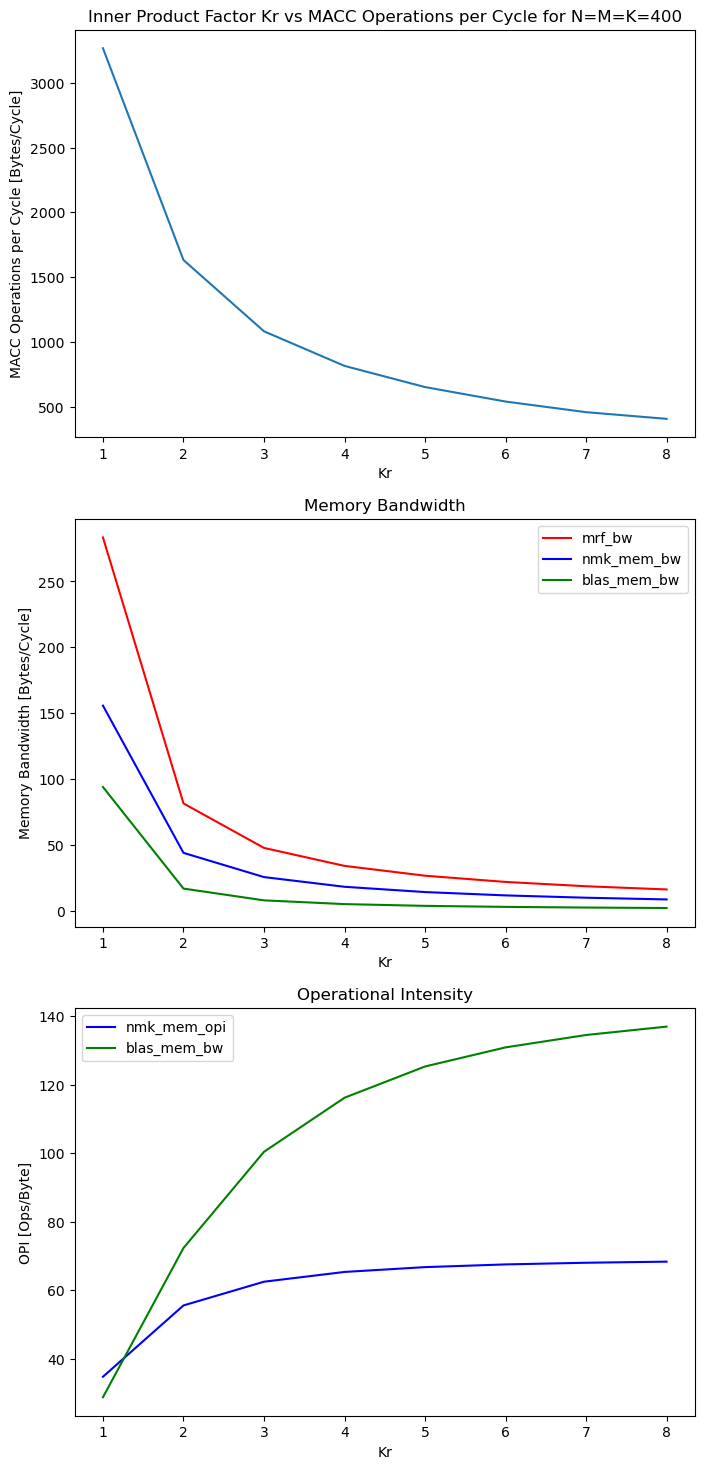

In [3]:
fig, axs = plt.subplots(3, figsize=(8,18))
axs[0].set_title('Inner Product Factor Kr vs MACC Operations per Cycle for N=M=K=400')
axs[0].set_xlabel('Kr')
axs[0].set_ylabel('MACC Operations per Cycle [Bytes/Cycle]')
axs[1].set_title('Memory Bandwidth')
axs[1].set_xlabel('Kr')
axs[1].set_ylabel('Memory Bandwidth [Bytes/Cycle]')
axs[2].set_title('Operational Intensity')
axs[2].set_xlabel('Kr')
axs[2].set_ylabel('OPI [Ops/Byte]')

kls = np.array(range(1,9))
K = 400
perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                            mlB=np.array([512/8]),
                            kl=kls,
                            M=np.array([K]),
                            N=np.array([K]),
                            K=np.array([K]))

blas_mem_bw = perf_model['blas_mem_bw']
blas_mem_opi = perf_model['blas_mem_opi']
nmk_mem_bw = perf_model['nmk_mem_bw']
nmk_mem_opi = perf_model['nmk_mem_opi']
mrf_bw = perf_model['mrf_bw']
opc = perf_model['ops_cycle']

axs[0].plot(kls, opc)

axs[1].plot(kls, mrf_bw, color='r')
axs[1].plot(kls, nmk_mem_bw, color='b')
axs[1].plot(kls, blas_mem_bw, color='g')
axs[1].legend(['mrf_bw', 'nmk_mem_bw', 'blas_mem_bw'])

axs[2].plot(kls, nmk_mem_opi, color='b')
axs[2].plot(kls, blas_mem_opi, color='g')
axs[2].legend(['nmk_mem_opi', 'blas_mem_bw'])

In [4]:
kls = np.array([1,2,4])
dims = np.array(range(64,1024, 64))

perf_model = fmodel.init_pm(vlB=np.array([512/8]),
                            mlB=np.array([512/8]),
                            kl=kls,
                            M=dims,
                            N=dims,
                            K=dims)

100%|██████████| 10125/10125 [00:38<00:00, 263.60it/s]


Text(0, 0.5, 'OPI [Ops/Byte]')

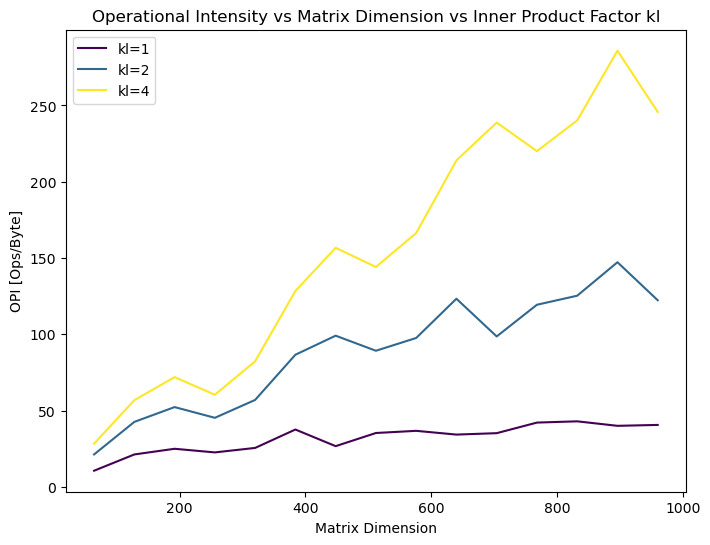

In [5]:
fig, axs = plt.subplots(figsize=(8,6))
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(vmin=kls.min(), vmax=kls.max())

for kl in kls:
    blas_mem_bw = np.zeros(len(dims))
    blas_mem_opi = np.zeros(len(dims))
    opc = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        blas_mem_opi[i] = perf_model.xs((dim, dim, dim, kl), level=['M', 'N', 'K','kl'])['blas_mem_opi'].values

    axs.plot(dims, blas_mem_opi, color=cmap(norm(kl)))

axs.legend([f'kl={kl}' for kl in kls])
axs.set_title('Operational Intensity vs Matrix Dimension vs Inner Product Factor kl')
axs.set_xlabel('Matrix Dimension')
axs.set_ylabel('OPI [Ops/Byte]')


100%|██████████| 8/8 [00:00<00:00, 912.75it/s]


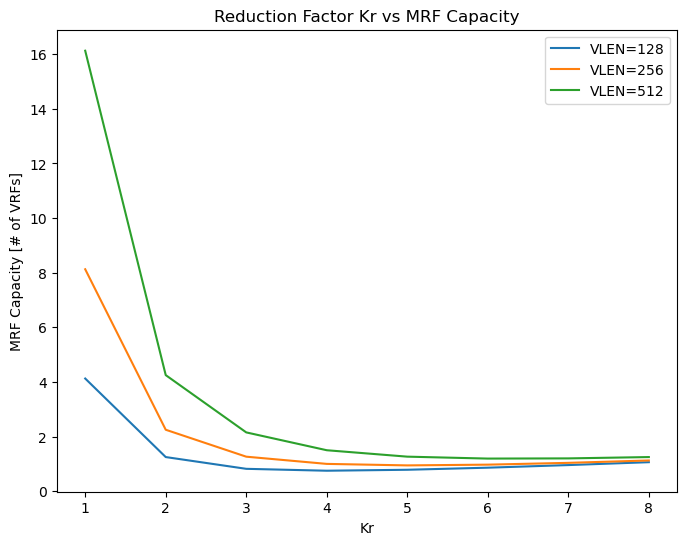

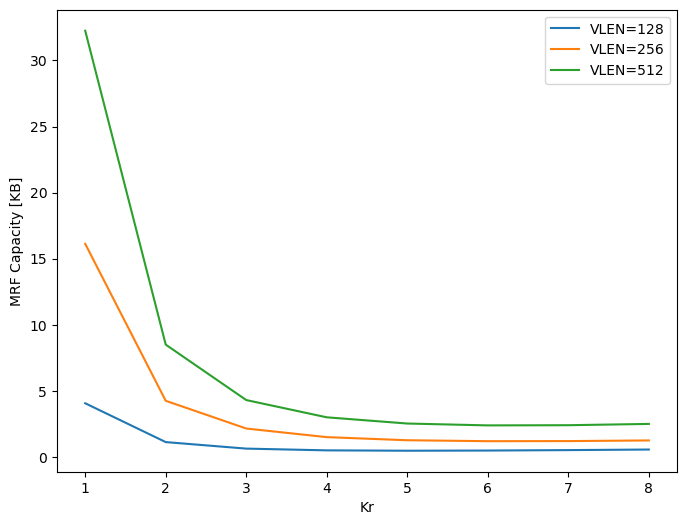

t_uk  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1           438.222222   
                                  2  64.0 64.0 2         2    4     1           921.777778   
                                  3  64.0 64.0 2         2    4     1          1386.370370   
                                  4  64.0 64.0 2         2    4     1          1846.222222   
                                  5  64.0 64.0 2         2    4     1          2304.177778   
                                  6  64.0 64.0 2         2    4     1          2761.185185   
                                  7  64.0 64.0 2         2    4     1          3217.650794   
                                  8  64.0 64.0 2         2    4     1          3673.777778   

                                                                                   util  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1          1.000000   
                                  2  64.0 64.0 2         2    4     1          1.000000   
                                  3  64.0 64.0 2         2    4     1          0.998752   
                                  4  64.0 64.0 2         2    4     1          1.000000   
                                  5  64.0 64.0 2         2    4     1          1.000000   
                                  6  64.0 64.0 2         2    4     1          0.995025   
                                  7  64.0 64.0 2         2    4     1          0.993789   
                                  8  64.0 64.0 2         2    4     1          1.000000   

                                                                                 ops_cycle  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1          4096.000000   
                                  2  64.0 64.0 2         2    4     1          2048.000000   
                                  3  64.0 64.0 2         2    4     1          1363.628797   
                                  4  64.0 64.0 2         2    4     1          1024.000000   
                                  5  64.0 64.0 2         2    4     1           819.200000   
                                  6  64.0 64.0 2         2    4     1           679.270315   
                                  7  64.0 64.0 2         2    4     1           581.508429   
                                  8  64.0 64.0 2         2    4     1           512.000000   

                                                                               max_mregs  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu              
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1                2.0   
                                  2  64.0 64.0 2         2    4     1                2.0   
                                  3  64.0 64.0 2         2    4     1                2.0   
                                  4  64.0 64.0 2         2    4     1                2.0   
                                  5  64.0 64.0 2         2    4     1                2.0   
                                  6  64.0 64.0 2         2    4     1                2.0   
                                  7  64.0 64.0 2         2    4     1                2.0   
                                  8  64.0 64.0 2         2    4     1                2.0   

                                                                               max_mrf_capacity  \
databits t_mem M  N  K   l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu                     
8        20    64 64 800 256      1  64.0 64.0 2         2    4     1                 32.250000   
                                  2  64.0 64.0 2         2    4     1      

In [6]:
fig, axs = plt.subplots(figsize=(8,6))
axs.set_title('Reduction Factor Kr vs MRF Capacity')
axs.set_xlabel('Kr')
axs.set_ylabel('MRF Capacity [# of VRFs]')

fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.set_xlabel('Kr')
ax2.set_ylabel('MRF Capacity [KB]')

kls = np.array(range(1,9))
for vlB in np.array([128, 256, 512])/8:

    perf_model = fmodel.init_pm(databits=np.array([8]), 
                                vlB=np.array([vlB]), 
                                mlB=np.array([vlB]), 
                                K=np.array([100*8]), 
                                kl=kls)

    mrf_capacity = perf_model['mrf_capacity']
    max_mrf_capacity = perf_model['max_mrf_capacity']

    axs.plot(kls, mrf_capacity*2**10/(vlB*32))
    ax2.plot(kls, max_mrf_capacity)

axs.legend(['VLEN=128', 'VLEN=256', 'VLEN=512'])
ax2.legend(['VLEN=128', 'VLEN=256', 'VLEN=512'])
plt.show()
perf_model

### Exploring Design Space

The model can be used to sweep ranges of the input parameters, and the output performance specs can be visualized using pareto-optimal curves.

With these plots we can visualize the tradeoffs between ngates capacity, memory bandwidth, and performance (operations per cycle).

In [7]:
perf_model = fmodel.init_pm(
    # software parameters
    N = np.array(range(4,64, 8)),
    M = np.array(range(4,64, 8)),
    K = np.array(range(4,64, 8)),
    widen = np.array([4]),
    # micro architecutre parameters
    mlB = np.array(range(256,513, 128))/8,
    vlB = np.array([256, 512])/8,
    kl = np.array([1,2,4]),
    width_mmu = np.array([0.5, 1])
)


100%|██████████| 18432/18432 [00:16<00:00, 1139.71it/s]


t_uk  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu           
8        20    20 60 4  256      4  32.0 64.0 2         2    4     0.5         296.0   
               28 60 4  256      4  32.0 64.0 2         2    4     0.5         296.0   
               36 60 4  256      1  64.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                 2  64.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                 4  32.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                    64.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
               44 60 4  256      1  64.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                 2  64.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                 4  32.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                    64.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                     60 256      4  32.0 32.0 2         2    4     0.5        1000.0   
               52 60 4  256      1  64.0 64.0 2         2    4     0.5         296.0   
                                 2  64.0 64.0 2         2    4     0.5         296.0   
                                 4  32.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                    64.0 64.0 2         2    4     0.5         296.0   
                     60 256      4  32.0 32.0 2         2    4     0.5        1000.0   
               60 60 4  256      1  64.0 64.0 2         2    4     0.5         296.0   
                                 2  64.0 64.0 2         2    4     0.5         296.0   
                                 4  32.0 48.0 2         2    4     0.5         232.0   
                                         64.0 2         2    4     0.5         296.0   
                                    64.0 64.0 2         2    4     0.5         296.0   
                     60 256      4  32.0 32.0 2         2    4     0.5        1000.0   

                                                                                  util  \
databits t_mem M  N  K  l2_cache kl vlB  mlB  num_mregs t_op widen width_mmu             
8        20    20 60 4  256      4  32.0 64.0 2         2    4     0.5        0.292969   
               28 60 4  256      4  32.0 64.0 2         2    4     0.5        0.410156   
               36 60 4  256      1  64.0 48.0 2         2    4     0.5        0.703125   
                                         64.0 2         2    4     0.5        0.527344   
                                 2  64.0 48.0 2         2    4     0.5        0.703125   
                                         64.0 2         2    4     0.5        0.527344   
                                 4  32.0 48.0 2         2    4     0.5        0.703125   
                                         64.0 2         2    4     0.5        0.527344   
                                    64.0 48.0 2         2    4     0.5        0.703125   
                                         64.0 2         2    4     0.5        0.527344   
               44 60 4  256      1  64.0 48.0 2         2    4     0.5        0.859375   
     

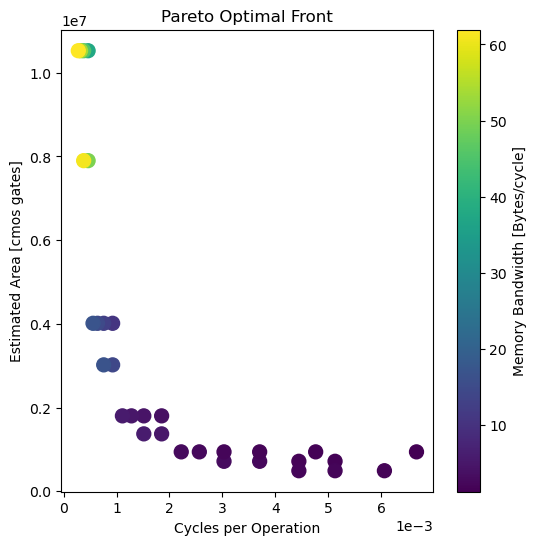

In [8]:
fperf_model = perf_model.copy()
fperf_model = fperf_model[fperf_model['nmk_mem_bw'] <= 64]
fperf_model = fperf_model[fperf_model['mrf_capacity'] <= 128]
fperf_model = fperf_model[fperf_model['ops_cycle'] >= 1/0.7e-2]

pm_pareto = fperf_model[['ops_cycle','opu_gates', 'nmk_mem_bw']]
mask = paretoset(pm_pareto, sense=['max', 'min', 'min'])

bw = fperf_model.loc[mask,'nmk_mem_bw']
ngates = fperf_model.loc[mask,'opu_gates']
opc = fperf_model.loc[mask,'ops_cycle']

fig, axs = plt.subplots(1,figsize=(6,6))
axs.set_title('Pareto Optimal Front')
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('Estimated Area [cmos gates]')

scatter = axs.scatter(1/opc, ngates, c=bw, cmap='viridis', s=100)
axs.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
fig.colorbar(scatter, ax=axs, label='Memory Bandwidth [Bytes/cycle]')
fperf_model[mask]

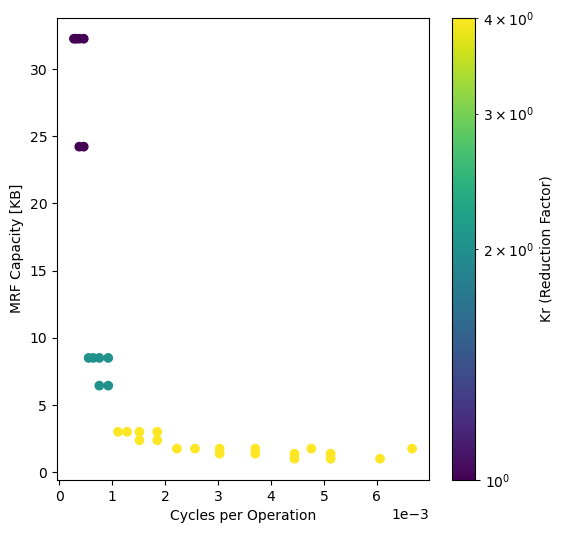

In [9]:
mrf = fperf_model.loc[mask, 'mrf_capacity']
fig, axs = plt.subplots(1, figsize=(6, 6))
kls = fperf_model.loc[mask].index.get_level_values('kl')
scatter = axs.scatter(1/opc, mrf, c=kls, cmap='viridis', norm=LogNorm())
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('MRF Capacity [KB]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.colorbar(scatter, ax=axs, label='Kr (Reduction Factor)')
plt.show()

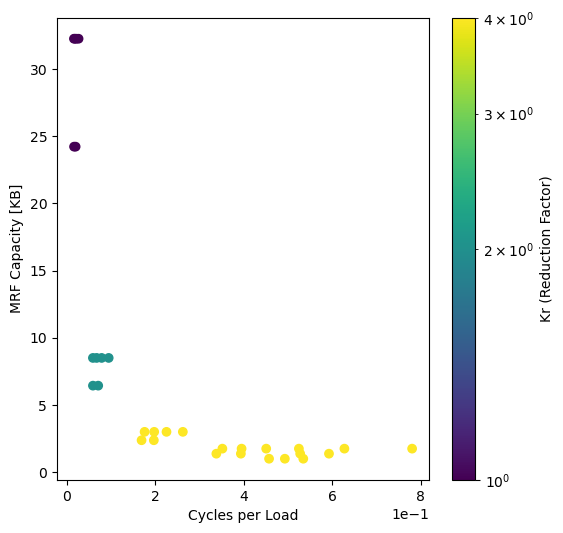

In [10]:
fig, axs = plt.subplots(1, figsize=(6, 6))
kls = fperf_model.loc[mask].index.get_level_values('kl')
scatter = axs.scatter(1/bw, mrf, c=kls, cmap='viridis', norm=LogNorm())
axs.set_xlabel('Cycles per Load')
axs.set_ylabel('MRF Capacity [KB]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.colorbar(scatter, ax=axs, label='Kr (Reduction Factor)')
plt.show()

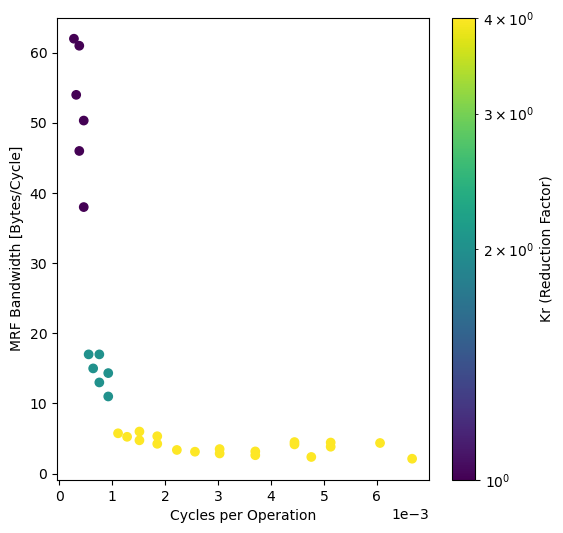

In [11]:
mrf = fperf_model.loc[mask, 'mrf_capacity']
mrf_bw = fperf_model.loc[mask, 'mrf_bw']
fig, axs = plt.subplots(1, figsize=(6, 6))
kls = fperf_model.loc[mask].index.get_level_values('kl')
scatter = axs.scatter(1/opc, mrf_bw, c=kls, cmap='viridis', norm=LogNorm())
axs.set_xlabel('Cycles per Operation')
axs.set_ylabel('MRF Bandwidth [Bytes/Cycle]')
axs.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
fig.colorbar(scatter, ax=axs, label='Kr (Reduction Factor)')
plt.show()